# Project 2 - Ames Housing Data and Kaggle Challenge

_Ang Sheng Jun DSI14_  

---
### Problem Statement 
Create regression model based on the Ames Housing Dataset that best predict the price of a house at sale.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('fivethirtyeight')

%matplotlib inline

### Load the Data
___ 
Training dataset is from __[DSI-US-6 Project 2 Regression Challenge](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)__. The dataset has some cell values that have 'NA' to represent lack of particular feature. Therefore, read in .csv file with keep_default_na=False so that only actual NaN values are used for parsing.

In [2]:
df = pd.read_csv('../datasets/train.csv',keep_default_na=False)
#df = pd.read_csv('../datasets/train.csv')
pd.set_option('display.max_columns', None)
# to reset columns, use pd.reset_option(“max_columns”)
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


### Basic EDA and Data Cleaning
---

In [3]:
# Change Headers to lower_case.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000


In [4]:
# Replace blank values with NaN
df.replace("",np.nan,inplace=True)

In [5]:
# Overview of datatypes for loaded dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2051 non-null   int64 
 1   pid              2051 non-null   int64 
 2   ms_subclass      2051 non-null   int64 
 3   ms_zoning        2051 non-null   object
 4   lot_frontage     1721 non-null   object
 5   lot_area         2051 non-null   int64 
 6   street           2051 non-null   object
 7   alley            2051 non-null   object
 8   lot_shape        2051 non-null   object
 9   land_contour     2051 non-null   object
 10  utilities        2051 non-null   object
 11  lot_config       2051 non-null   object
 12  land_slope       2051 non-null   object
 13  neighborhood     2051 non-null   object
 14  condition_1      2051 non-null   object
 15  condition_2      2051 non-null   object
 16  bldg_type        2051 non-null   object
 17  house_style      2051 non-null   

Our training dataset is 2051 rows by 81 columns. Comparing against the data dictionary, several columns are read in as object type due to NaN values.
For example, lot_frontage is read in as string as some of its cells contain non-numerical values. We will change the column type to float.

In [6]:
# Change column type to float
df['lot_frontage'] = pd.to_numeric(df['lot_frontage'])
df['lot_frontage'].dtypes

dtype('float64')

In [7]:
# Change the following columns of object type to float
df['mas_vnr_area'] = df['mas_vnr_area'].astype(float)
df['bsmtfin_sf_1'] = df['bsmtfin_sf_1'].astype(float)

df['bsmtfin_sf_2'] = df['bsmtfin_sf_2'].map(lambda val: float(val))
df[['bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_cars','garage_area']] =\
df[['bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_yr_blt','garage_cars','garage_area']]\
.apply(pd.to_numeric,axis=1)

df['garage_cars'].dtypes

dtype('float64')

In [8]:
# check datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
null_col = df.isna().sum().sort_values()
null_col[null_col>0]

bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_qual           1
bsmtfin_sf_1        1
garage_qual         1
bsmtfin_sf_2        1
garage_area         1
garage_cars         1
garage_finish       1
bsmtfin_type_1      1
bsmt_cond           1
garage_cond         1
bsmt_full_bath      2
bsmt_half_bath      2
bsmtfin_type_2      2
bsmt_exposure       4
mas_vnr_area       22
mas_vnr_type       22
garage_yr_blt     114
lot_frontage      330
dtype: int64

In [10]:
# Summary Statistics
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


No negative values observed. There is significant interval between max and 75percentile for some columns. This could indicate presence of outliers. For example, mas_vnr_area: Masonry veneer area has a significant difference between 75thpercentile (161 sq_ft) and max. (1600 sq_ft). In particular, 621sq_ft at mean+3std. Similar observations on difference between 75thpercentile and max.for:
- bsmtfin_sf_1: basement type 1 finished area,  
- bsmtfin_sf_2: basement type 2 finished area,
- bsmt_unf_sf: unfinished basement area,
- total_bsmt_sf: total basement area, 
- 1st_flr_sf: First floor area
- 2nd_flr_sf: Second floor area
- low_qual_fin_sf: Low quality finished area (all floors)
- gr_liv_area: Above grade (ground) living area
- garage_area
- wood_deck_sf: Wood deck area
- open_porch_sf: Open porch area
- enclosed_porch: Enclosed porch area
- 3ssn_porch: Three season porch area
- screen_porch: Screen porch area (\the areas of wood deck to screen porch seem indpendent from each other. Each variable are equally suited as potential predictors to target, pending correlation review.)
- pool_area
- misc_value: value of miscellaneous features (\we can infer these as luxury features atypical of residential homes from data dict descriptions)
- saleprice

In [11]:
df.loc[df['total_bsmt_sf'] == 6110]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000


total_bsmt_sf is sum of all basement areas. Would consider it a potential representative candidate for all basement area variable, if required.

In [12]:
df.loc[df['low_qual_fin_sf'] == 1064]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
828,661,535381040,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1313.0,1313.0,GasA,TA,Y,SBrkr,1313,0,1064,2377,0.0,0.0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954.0,Unf,2.0,528.0,TA,TA,Y,0,0,432,0,0,0,NA,NA,NA,0,6,2009,WD,142900


Similarly for living area, gr_liv_area is the total of 1st_flr_sf,	2nd_flr_sf	and low_qual_fin_sf.

In [13]:
df.loc[df['wood_deck_sf'] < 1000].head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000


wood_deck_sf and other outdoor porch feature areas are independent from each other.

Observe that saleprice has data majority below 40_000 range; expect that the model would not perform well for saleproce predicton above 40_000.

In [14]:
# Clean cell value for sale_type
df['sale_type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

In [15]:
df['sale_type'] = df['sale_type'].str.strip()
df['sale_type'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI', 'ConLw'],
      dtype=object)

### Dealing with Null values. Drop NaN, ignore or impute?

From the list of columns with null values, we can further look at it by cluster. Let's start with basement columns.

In [16]:
# Check the null value row for bsmt_unf_sf
df.loc[df['bsmt_unf_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [17]:
# define a function to check for other basement-related columns with null
def row_null_id(column):
    return df.loc[df[column].isnull()]

In [18]:
# Check null for basement related columns
row_null_id('total_bsmt_sf')
#row_null_id('bsmt_qual')
#row_null_id('bsmtfin_sf_1')
#row_null_id('bsmtfin_sf_2')
#row_null_id('bsmt_cond')
#row_null_id('bsmtfin_type_1')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


A comparison through the rest ('bsmt_qual', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmt_cond', 'bsmtfin_type_1') converges on single row indexed 1327. We could drop these null cells, since it constitute a small percentage of overall observations (1 out of 2051).

In [19]:
# Check null for basement-bath related columns
#row_null_id('bsmt_full_bath')
row_null_id('bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


For row 616, from bstmt_qual = NA, we can deduce this property has no basement. So we can replace the NaN values for 'bsmt_full_bath' and 'bsmt_half_bath' as 0 (reference to data dict).

In [20]:
df['bsmt_full_bath'].dtypes

dtype('float64')

In [21]:
# Replace 'bsmt_full_bath' at index 616 to 0.0
df.iloc[616, 48] = 0.0

In [22]:
# Replace 'bsmt_half_bath' at index 616 to 0.0
df.iloc[616, 49] = 0.0

In [23]:
# Check null replacement for basement-bath related columns at index 616 done
# Not expect to see index 616 returned
row_null_id('bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [24]:
# Check null for basement-finish related columns
row_null_id('bsmtfin_type_2')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


For row 1147, there is basement2 as indicated by its area from column bsmtfin_sf_2. We could impute a mode for this row (categorical variable) or either drop this row.

In [25]:
print(df['bsmtfin_type_2'].dtypes)
# Most occurring basement finish type 2
df['bsmtfin_type_2'].mode()

object


0    Unf
dtype: object

In [26]:
# Check the cell value of interest
df.iloc[1147].loc['bsmtfin_type_2']

nan

In [27]:
# Update and Check
# note targetted cell value doesn't work with below line of code.
# df.iloc[1147].loc['bsmtfin_type_2'].fillna('Unf',inplace=True) 
df['bsmtfin_type_2'].fillna('Unf',inplace=True)
df.iloc[1147].loc['bsmtfin_type_2']

'Unf'

We note that this will update the row for 1327, but it is fine. Reason being there are other cells along row 1327 we can leverage to remove row 1327 later on. 

In [28]:
row_null_id('bsmt_exposure')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,Unf,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


For rows 1456, 1547, 1997, there is basement as indicated by bsmt_qual. We could impute a mode for bsmt_exposure for these rows (categorical variable).

In [29]:
print(df['bsmt_exposure'].dtypes)
# Most occurring basement finish type 2
df['bsmt_exposure'].mode()

object


0    No
dtype: object

In [30]:
# Update and Check
df['bsmt_exposure'].fillna('No',inplace=True)
df.iloc[1456].loc['bsmt_exposure']

'No'

Again, this will update the row for 1327, but still acceptable. Reason being there are other cells (e.g. bsmtfin_sf_1) along row 1327 we can leverage to remove row 1327 later on.

In [31]:
# Check null entries for garage-related columns
row_null_id('garage_qual')
#row_null_id('garage_area')
#row_null_id('garage_cars')
#row_null_id('garage_finish')
#row_null_id('garage_cond')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


Similarly, for garage-related null cells, all converge to single row indexed 1712. We couldn't deduce if there is a garage from garage_qual. Again we could choose to drop these null cells.

In [32]:
# Check null entries for masonary veneer
row_null_id('mas_vnr_area')
#row_null_id('mas_vnr_type')      

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,200

Same 22 rows from null check for masonary veneer type and area. From data dict, we can deduce these as absence of masonary veneer. Impute masonary veneer type as None, masonary area as 0 for these NaN values.

In [33]:
# Update and Check for mas_vnr_area
df['mas_vnr_area'].fillna(0.0,inplace=True)
df.iloc[22].loc['mas_vnr_area']

0.0

In [34]:
# Update and Check for mas_vnr_type
print(df['mas_vnr_type'].dtypes)
df['mas_vnr_type'].fillna('None',inplace=True)
df.iloc[22].loc['mas_vnr_type']

object


'None'

In [35]:
# Check null entries for garage-related columns
row_null_id('garage_yr_blt')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,133,0,0,0,NA,NA,NA,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,200,26,0,0,0,0,NA,NA,NA,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,30,0,0,0,0,NA,NA,NA,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,0,176,0,0,NA,NA,NA,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,144,0,0,0,NA,NA,NA,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NA,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,128,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,23,0,0,0,NA,NA,NA,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,0,0,0,0,0,NA,NA,NA,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,

From garage_type information, we can deduce these NaN values in garage_yr_blt are because of absence of garage. 114 observations comprise ~5% of total 2051 observations. We lose signifcant observations if we choose to just drop these null value cells. We could replace these with 0.0 to represent absence of garage. For regression, we will need to be mindful of this imputation aspect, if we are to use this variable later on. One mitigation is to use other correlated variables in place of this one. This will depend on the correlation analysis later on.

In [36]:
# Update and Check for garage_yr_blt
print(df['garage_yr_blt'].dtypes)
df['garage_yr_blt'].fillna(0.0,inplace=True)
df.iloc[28].loc['garage_yr_blt']

float64


0.0

In [37]:
# Check null entries for lot_frontage
row_null_id('lot_frontage')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1963.0,RFn,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,Av,Rec,1110.0,Unf,0.0,734.0,1844.0,GasA,Gd,Y,SBrkr,1844,0,0,1844,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969.0,RFn,2.0,540.0,TA,TA,Y,0,73,216,0,0,0,NA,NA,NA,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,NA,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297.0,Rec,68.0,1203.0,1568.0,GasA,TA,Y,SBrkr,2156,0,0,2156,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2.0,508.0,Gd,TA,Y,0,80,0,290,0,0,NA,NA

From lot_frontage refers to the linear feet of street connected to property. From street information, we can deduce there is lot_frontage. Observing the potential presence of outliers from summary statistics for lot_frontage, we can use median value to impute for these missing values.

In [38]:
df['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [39]:
df['lot_frontage']
# Update and Check for 'lot_frontage'
print(df['lot_frontage'].dtypes)
df['lot_frontage'].fillna(68.0,inplace=True)
df.iloc[0].loc['lot_frontage']

float64


68.0

In [40]:
# Check null values progress
null_col = df.isna().sum().sort_values()
null_col[null_col>0]

garage_qual       1
bsmtfin_sf_2      1
bsmt_unf_sf       1
total_bsmt_sf     1
bsmt_cond         1
bsmt_qual         1
bsmtfin_type_1    1
bsmt_half_bath    1
garage_finish     1
garage_cars       1
bsmt_full_bath    1
garage_cond       1
garage_area       1
bsmtfin_sf_1      1
dtype: int64

In [41]:
# Drop null values (we should be left with 2051-2 rows)
print(df.shape)
df.dropna(inplace=True)
df.shape

(2051, 81)


(2049, 81)

In [42]:
# Save cleaned train data
df.to_csv('../datasets/train_Clean.csv')

### Variables selection as predictors of saleprice

On building a regression model to best predict salesprice, we want to identify the housing characteristics are strongly associated with perceived value of the property. Given 80 variables, we want to select and use max. 25-30 variables. The study of the data dict is useful for making informed decisions for prelim shortlisting of variables. 

In general, the variables informs on location, neighbourhood, housing type and exterior, basement, heating and cooling, living space and functionality, fireplace, garage, porch and pool, miscellaneous features, time of sale and sale-type.

!!! (review this part) Some variables are of categorical nature which have not been encoded yet, we shall revist encoded categorical variables when we screen them for potential predictors to target. Start with correlation values to shortlist predictors. Our target is the salesprice.

In [43]:
# Stocktake numerical variables
df._get_numeric_data().columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

Among the numerical columns at this stage, overall_qual is a catergorical (ordinal) feature. There should be a difference in its distributions to saleprice, if there is some strong association to target. 

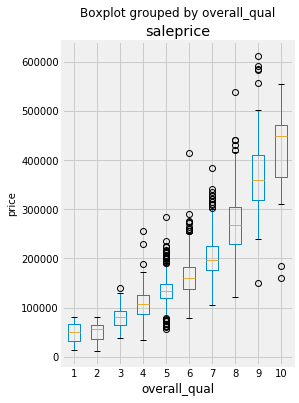

In [44]:
# Distribution of overall_qual to saleprice 
df.boxplot(column='saleprice', by='overall_qual',figsize = (4,6))
plt.ylabel("price", size=10);

year_built, year_remod/add and yr_sold are catergorical (nominal). We create dummy variables for these before passing into correlation matrix. 

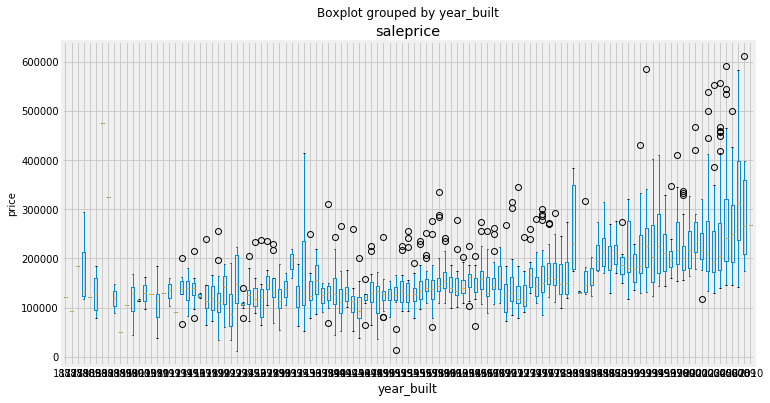

In [45]:
# Distribution of year_built to saleprice
df.boxplot(column='saleprice', by='year_built',figsize = (12,6))
plt.ylabel("price", size=10);

### Feature Engineering1: year_built, year_remod/add, yr_sold 

In [46]:
# year_built summary statistics
df[['year_built','year_remod/add','yr_sold']].describe()

,year_built,year_remod/add,yr_sold
count,2049.000000,2049.000000,2049.000000
mean,1971.745242,1984.199610,2007.775988
std,30.168060,21.030407,1.312533
min,1872.000000,1950.000000,2006.000000
25%,1954.000000,1965.000000,2007.000000
50%,1974.000000,1993.000000,2008.000000
75%,2001.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000


Engineer dummy variable using median.
- year_built_aft1974 (built after 1974) as 1
- year_remod/add_aft1993 (remod/add after 1993) as 1
- yr_sold_aft2008 (sold after 2008) as 1

In [47]:
print(df['year_built'].dtypes)
print(df['year_remod/add'].dtypes)
print(df['yr_sold'].dtypes)

int64
int64
int64


In [48]:
df['year_built_aft1974'] = (df['year_built'] > 1974).astype(int)
df['year_built_aft1974'].value_counts()

0    1027
1    1022
Name: year_built_aft1974, dtype: int64

In [49]:
df['year_remod/add_aft1993'] = (df['year_remod/add'] > 1993).astype(int)
df['year_remod/add_aft1993'].value_counts()

0    1041
1    1008
Name: year_remod/add_aft1993, dtype: int64

In [50]:
df['yr_sold_aft2008'] = (df['yr_sold'] > 2008).astype(int)
df['yr_sold_aft2008'].value_counts()

0    1369
1     680
Name: yr_sold_aft2008, dtype: int64

### Correlation of numerical columns with target

In [51]:
# Correlation with target
cor_target1 = abs(df.corr()['saleprice']).sort_values()
cor_target1

misc_val                  0.007452
yr_sold                   0.015215
bsmtfin_sf_2              0.016201
yr_sold_aft2008           0.017139
pool_area                 0.023065
mo_sold                   0.032034
low_qual_fin_sf           0.041702
bsmt_half_bath            0.045518
3ssn_porch                0.048670
id                        0.051360
ms_subclass               0.087881
overall_cond              0.096209
kitchen_abvgr             0.125670
screen_porch              0.134411
enclosed_porch            0.135695
bedroom_abvgr             0.136555
bsmt_unf_sf               0.190123
2nd_flr_sf                0.248460
pid                       0.254465
garage_yr_blt             0.259166
half_bath                 0.282595
bsmt_full_bath            0.282880
lot_area                  0.296312
lot_frontage              0.326220
wood_deck_sf              0.326365
open_porch_sf             0.333123
bsmtfin_sf_1              0.423583
fireplaces                0.470740
year_remod/add_aft19

Variables with corr above 0.5 after potential relevant predictors to target.

In [52]:
df_heatmap1 = df[['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf','year_built',\
                 'year_built_aft1974','year_remod/add','year_remod/add_aft1993','full_bath','totrms_abvgrd',\
                  'mas_vnr_area','saleprice']]

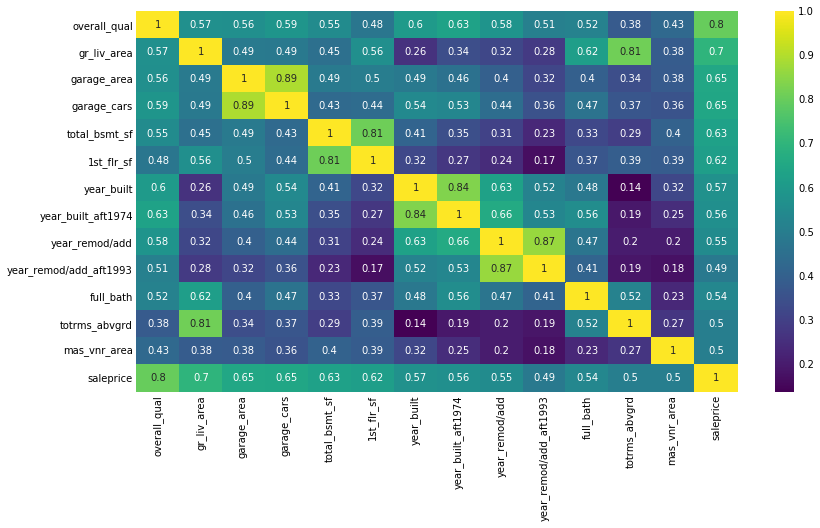

In [53]:
# Check collinearity among variables
plt.figure(figsize=(12,7))
sns.heatmap(df_heatmap1.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

High corr value between: 
- gr_liv_area and 1st_flr_sq. Use gr_liv_area
- garage_area and garage_cars. Use garage_area
- year_built and year_built_aft1974. Use the engineered feature year_built_aft1974.
- year_remod/add, year_remod/add_after1993 with year_built_aft1974. Use year_built_aft1974.
- gr_liv_area, totrms_abvgrd. Use gr_liv_area.

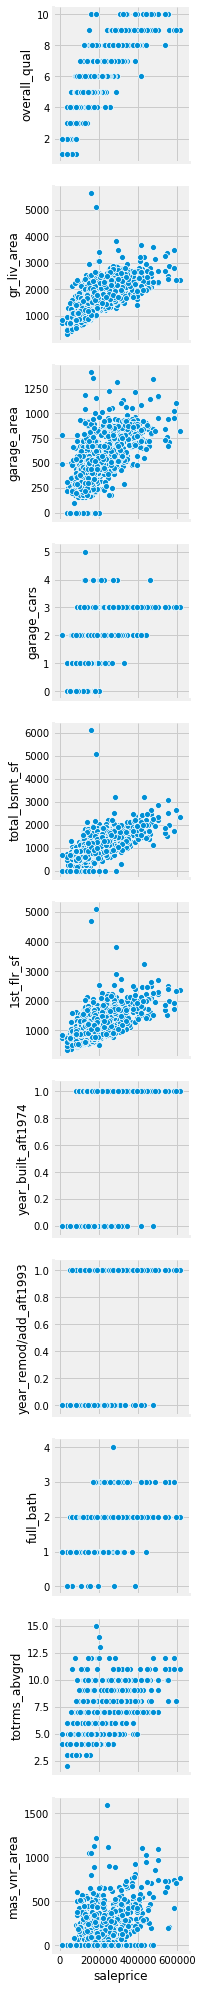

In [54]:
# Check linearity of relevant predictors to target
sns.pairplot(df, y_vars=['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf',\
                         'year_built_aft1974','year_remod/add_aft1993','full_bath','totrms_abvgrd','mas_vnr_area'\
                        ],x_vars=['saleprice']);

**Predictors shortlist (rd_1)**: overall_qual, gr_liv_area, garage_area, total_bsmt_sf, year_built_aft1974, full_bath, mas_vnr_area.

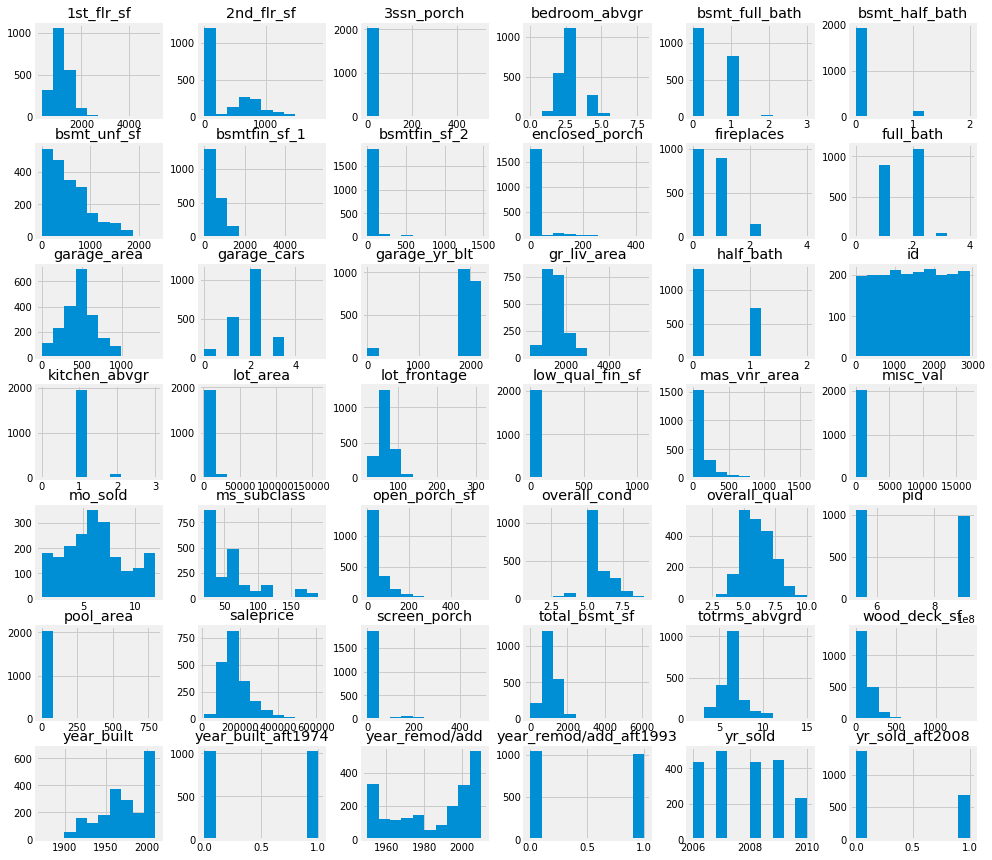

In [55]:
# Histogram for numerical columns
df.hist(figsize=(15,15));

Observe that saleprice has data majority below 40_000 range; expect that the model would not perform well for saleprice predicton above 40_000. Also the skew of saleprice and observations from summary stats indicate presence of outliers.

#### Checking for Outliers (predictors rd_1 shortlist)

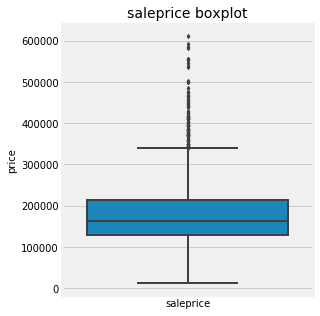

In [56]:
# Outliers in sale price
plt.figure(figsize = (4,5))
plt.title("saleprice boxplot", size=14)
sns.boxplot(data = df[['saleprice']], linewidth=2, fliersize=3)
plt.ylabel("price", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

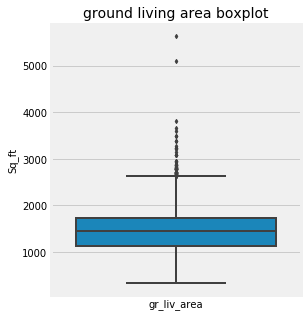

In [57]:
# Outliers in ground living area
plt.figure(figsize = (4,5))
plt.title("ground living area boxplot", size=14)
sns.boxplot(data = df[['gr_liv_area']], linewidth=2, fliersize=3)
plt.ylabel("Sq_ft", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

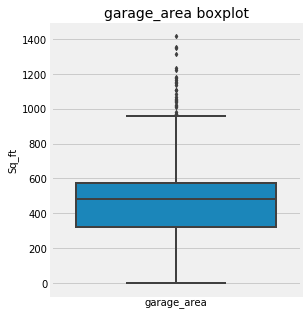

In [58]:
plt.figure(figsize = (4,5))
plt.title("garage_area boxplot", size=14)
sns.boxplot(data = df[['garage_area']], linewidth=2, fliersize=3)
plt.ylabel("Sq_ft", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

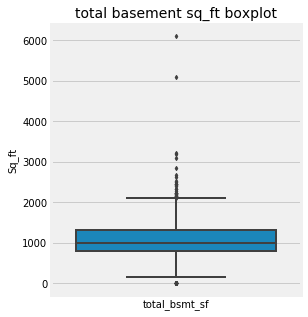

In [59]:
# Outliers in total_bsmt_sf
plt.figure(figsize = (4,5))
plt.title("total basement sq_ft boxplot", size=14)
sns.boxplot(data = df[['total_bsmt_sf']], linewidth=2, fliersize=3)
plt.ylabel("Sq_ft", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

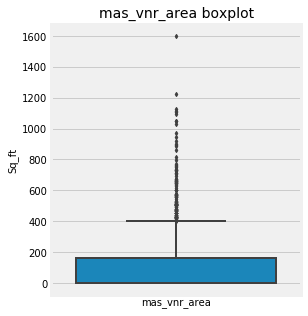

In [60]:
# Outliers in mas_vnr_area
plt.figure(figsize = (4,5))
plt.title("mas_vnr_area boxplot", size=14)
sns.boxplot(data = df[['mas_vnr_area']], linewidth=2, fliersize=3)
plt.ylabel("Sq_ft", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

This is a trend in the outliers of these predictor variables contributing to the outliers in price. If we don't account for these, the model is not expect to do well for higher saleprice predictions. 

### Feature Engineering2 (Dummy Variables to account for outliers)

In [61]:
df[['gr_liv_area', 'garage_area', 'total_bsmt_sf']].describe() 

,gr_liv_area,garage_area,total_bsmt_sf
count,2049.000000,2049.000000,2049.000000
mean,1499.464129,473.766227,1058.084919
std,500.461893,215.944850,449.498894
min,334.000000,0.000000,0.000000
25%,1130.000000,319.000000,793.000000
50%,1444.000000,480.000000,995.000000
75%,1728.000000,576.000000,1319.000000
max,5642.000000,1418.000000,6110.000000


Engineer dummy variable (sq_ft x (positive) std deviation away from mean.
Iterative process to evaluate suitable std deviation via 
- huge_gr_liv_area (> 4_000) 4std dev
- huge_garage_area (> 1_338); 4std dev
- huge total_bsmt_sf (> 2_858); 4std dev

In [62]:
df['huge_gr_liv_area'] = (df['gr_liv_area'] > 3_750).astype(int)
df['huge_gr_liv_area'].value_counts()

0    2046
1       3
Name: huge_gr_liv_area, dtype: int64

In [63]:
df['huge_garage_area'] = (df['garage_area'] > 1_338).astype(int)
df['huge_garage_area'].value_counts()

0    2046
1       3
Name: huge_garage_area, dtype: int64

In [64]:
df['huge_total_bsmt_sf'] = (df['total_bsmt_sf'] > 2_858).astype(int)
df['huge_total_bsmt_sf'].value_counts()

0    2044
1       5
Name: huge_total_bsmt_sf, dtype: int64

In [65]:
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,year_built_aft1974,year_remod/add_aft1993,yr_sold_aft2008,huge_gr_liv_area,huge_garage_area,huge_total_bsmt_sf
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,1,1,1,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,1,1,1,0,0,0


### Modeling: Model 1

**Predictors to use (rd_1)**: overall_qual, gr_liv_area, garage_area, total_bsmt_sf, year_built_aft1974, full_bath, mas_vnr_area, 'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf'.

In [66]:
# Visualise MLR (built from Predictors to use (rd_1)
X1 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
        'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf']].values
y1 = df['saleprice'].values

model_1 = LinearRegression()
model_1.fit(X1, y1)

y_pred_1 = model_1.predict(X1)

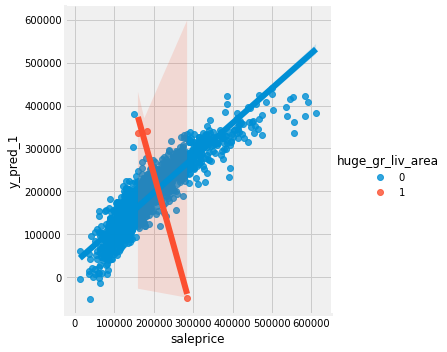

In [67]:
# True saleprice vs predicted saleprice
df['y_pred_1'] = y_pred_1
sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_gr_liv_area');
#sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_garage_area')
#sns.lmplot(x='saleprice', y='y_pred_1', data=df, hue='huge_total_bsmt_sf')

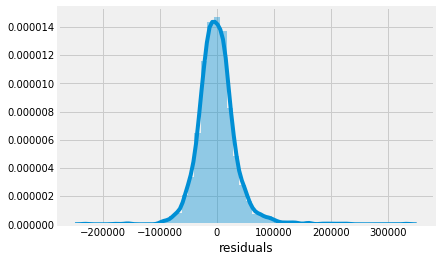

In [68]:
# Visualise normality of residuals (errors)
df['residuals'] = df['saleprice'] - df['y_pred_1']
sns.distplot(df['residuals']);

Errors are approximately normal.

### Model Evaluation: Model 1

In [69]:
# define function for r2 adjusted
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [70]:
# define function to compute model metrics
def model_metrics(y_true, y_pred, p):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [71]:
# Model_1 metrics
model_metrics(df['saleprice'],y_pred_1,X1.shape[1])

Mean squared error      =  1189119023.198987
Root mean squared error =  34483.6051363396
R^2                     =  0.8106322403433646
Adjusted R^2            =  0.8097030560467178


### Feature Engineering3 (Categorical Variables)

From the data dict, there are both ordinal and nominal types among the provided catergorical variables. Given that we want to
- limit the number of variables for regression between 25-30,
- the ordinal ranking point to potential association to saleprice, 
- for most nominal categorical variables, the association to saleprice could be generalised by proxy via quality/ condition rating.\
Hence, focus priority on ordinal categories. Check categorical variables distributions wrt. target. If there is a meaningful difference in the distribution, the variables could be associated to target. 

In [72]:
# Function for box plot distribution
def boxplot(target,predictor):
    df.boxplot(column=target, by=predictor,figsize = (5,6));

#### Neighbourhood Utility feature(s)

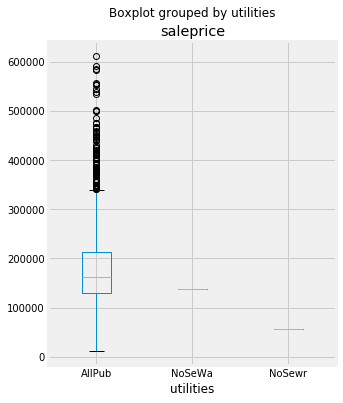

In [73]:
# Distribution of saleprice by utilities
boxplot('saleprice','utilities')

Availability of AllPub stongly associated with saleprice. 

In [74]:
# Ordinal encoding for utilities 
# Data dict: AllPub,NoSeWa,NoSewr,ELO
print(df['utilities'].value_counts())
df['utilities'] = df['utilities'].map({'AllPub':4,'NoSeWa':3,'NoSewr':2,'ELO':1})

AllPub    2047
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64


#### Housing Exterior  feature(s)

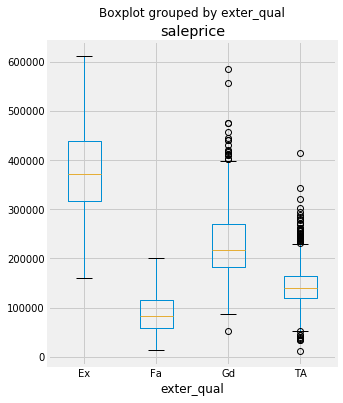

In [75]:
# Distribution of saleprice by exter_qual
boxplot('saleprice','exter_qual')

Varying distributions by quality for exter_qual wrt. saleprice.

In [76]:
# Ordinal encoding for exter_qual
# Data dict: Ex,Gd,TA,Fa,Po
print(df['exter_qual'].value_counts())
df['exter_qual'] = df['exter_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

TA    1245
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64


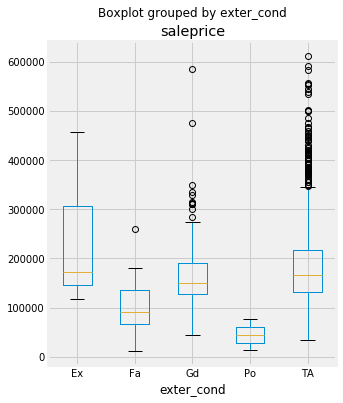

In [77]:
# Distribution of saleprice by exter_cond
boxplot('saleprice','exter_cond')

Varying distributions for exter_cond. Interestingly, the outliers for Gd and TA rating exceeds the max. of Ex. No outliers observed for Ex rating. exter_cond and exter_qual appears to be correlated for the boxplots. 

In [78]:
# Ordinal encoding for exter_cond
# Data dict: Ex,Gd,TA,Fa,Po
print(df['exter_cond'].value_counts())
df['exter_cond'] = df['exter_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

TA    1776
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64


#### Basement  feature(s)

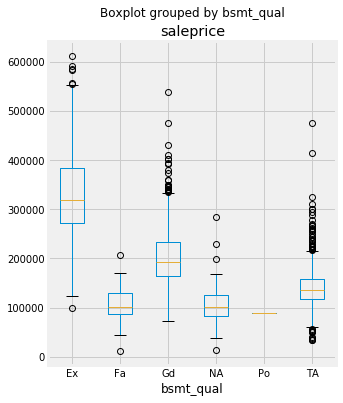

In [79]:
# Distribution of saleprice by bsmt_qual
boxplot('saleprice','bsmt_qual')

Varying distributions for bsmt_qual. 

In [80]:
# Ordinal encoding for bsmt_qual
# Data dict: Ex,Gd,TA,Fa,Po,NA
print(df['bsmt_qual'].value_counts())
df['bsmt_qual'] = df['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

TA    887
Gd    863
Ex    184
Fa     60
NA     54
Po      1
Name: bsmt_qual, dtype: int64


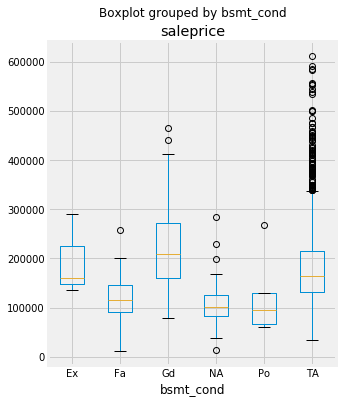

In [81]:
# Distribution of saleprice by bsmt_cond
boxplot('saleprice','bsmt_cond')

Varying distributions for bsmt_cond. Fa, Po and NA rating price distribution appears consistent. The correlation between bsmt_qual and bsmt_cond to saleprice is not as distinct as that for exter_qual and exter_cond.

In [82]:
# Ordinal encoding for bsmt_cond
# Data dict: Ex,Gd,TA,Fa,Po,NA
print(df['bsmt_cond'].value_counts())
df['bsmt_cond'] = df['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

TA    1833
Gd      89
Fa      65
NA      54
Po       5
Ex       3
Name: bsmt_cond, dtype: int64


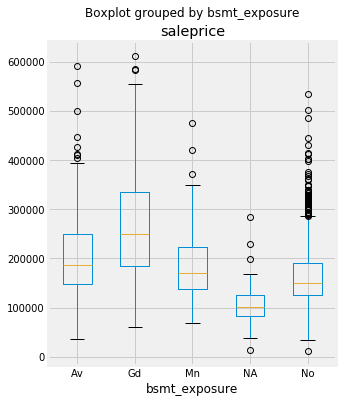

In [83]:
# Distribution of saleprice by bsmt_exposure
boxplot('saleprice','bsmt_exposure')

There is a cluster for Av, Mn and No bsmt_exposure.

In [84]:
# Ordinal encoding for bsmt_exposure
# Data dict: Gd,Av,Mn,No,NA
print(df['bsmt_exposure'].value_counts())
df['bsmt_exposure'] = df['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

No    1341
Av     288
Gd     203
Mn     163
NA      54
Name: bsmt_exposure, dtype: int64


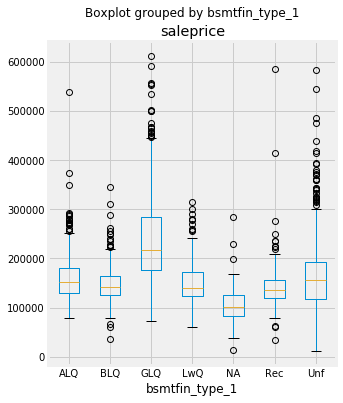

In [85]:
# Distribution of saleprice by bsmtfin_type_1
boxplot('saleprice','bsmtfin_type_1')

GLQ has a distinct distribution from the rest of the ratings.

In [86]:
# Ordinal encoding for bsmtfin_type_1
# Data dict: GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA
print(df['bsmtfin_type_1'].value_counts())
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

GLQ    615
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
NA      54
Name: bsmtfin_type_1, dtype: int64


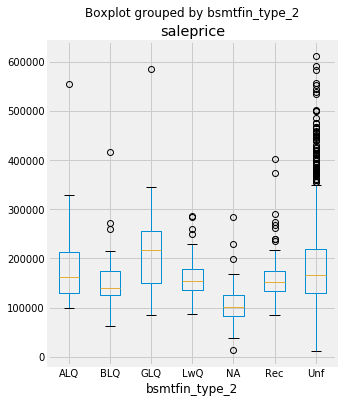

In [87]:
# Distribution of saleprice by bsmt_fin_type_2
boxplot('saleprice','bsmtfin_type_2')

Unf rating has significant number of outliers.

In [88]:
# Ordinal encoding for bsmtfin_type_2
# Data dict: GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA
print(df['bsmtfin_type_2'].value_counts())
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

Unf    1749
Rec      80
LwQ      60
NA       54
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


#### Heating/cooling/electrical feature(s)

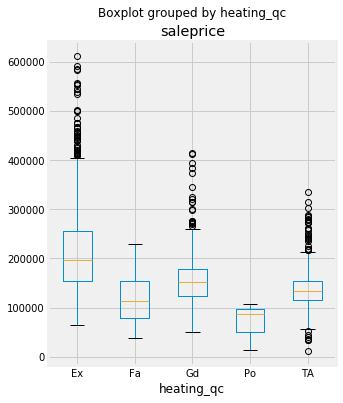

In [89]:
# Distribution of saleprice by heating_qc
boxplot('saleprice','heating_qc')

Distribution per rating varies with Ex heating quality and condition being a strong driver of saleprice.

In [90]:
# Nominal encoding for central_air
# Data dict: N,Y
print(df['central_air'].value_counts())
df['central_air'] = df['central_air'].map({'N':0,'Y':1})

Y    1908
N     141
Name: central_air, dtype: int64


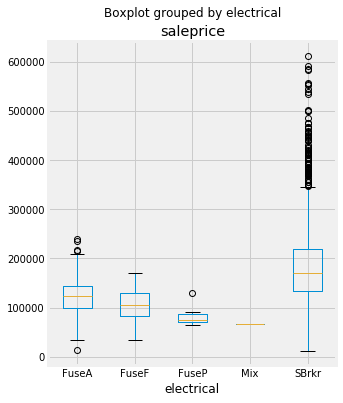

In [91]:
# Distribution of saleprice by electrical
boxplot('saleprice','electrical')

Sbrkr (Standard circuit breakers and romex) is a strong driver of saleprice. The lowest rating (Mix) is not strongly associated with driving saleprice.

In [92]:
# Ordinal encoding for electrical
# Data dict: SBrkr,FuseA,FuseF,FuseP,Mix
print(df['electrical'].value_counts())
df['electrical'] = df['electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})

SBrkr    1867
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64


#### Living space and functionality feature(s)

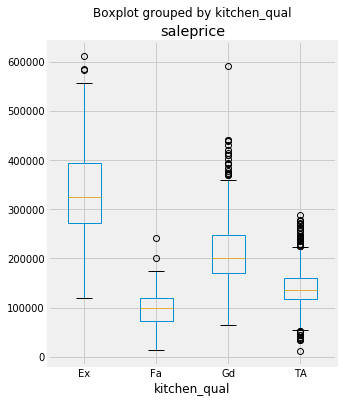

In [93]:
# Distribution of saleprice by kitchen_qual
boxplot('saleprice','kitchen_qual')

Meaningful variations in distribution of saleprice by kitchen quality.

In [94]:
# Ordinal encoding for kitchen_qual
# Data dict: Ex,Gd,TA,Fa,Po
print(df['kitchen_qual'].value_counts())
df['kitchen_qual'] = df['kitchen_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

TA    1046
Gd     805
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64


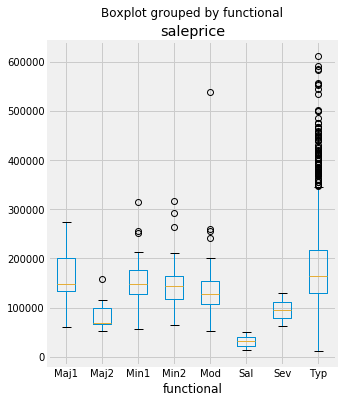

In [95]:
# Distribution of saleprice by functional
boxplot('saleprice','functional')

Understandably, Sal (salvage only) rating commands the lowest saleprice. Typ (Typical) rating, the highest rating, is a strong driver of saleprice.

In [96]:
# Ordinal encoding for functional
# Data dict: Typ,Min1,Min2,Mod,Maj1,Maj2,Sev,Sal
print(df['functional'].value_counts())
df['functional'] = df['functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})

Typ     1913
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: functional, dtype: int64


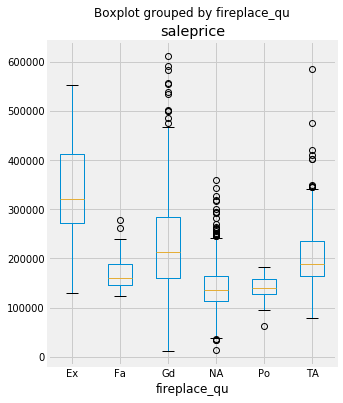

In [97]:
# Distribution of saleprice by fireplace_qu
boxplot('saleprice','fireplace_qu')

Cluster among Fa, Po and NA rating. Intrestingly, Gd rating has outliers that exceeds the saleprice distibution for Ex rating.

In [98]:
# Ordinal encoding for fireplace_qu
# Data dict: Ex,Gd,TA,Fa,Po,NA
print(df['fireplace_qu'].value_counts())
df['fireplace_qu'] = df['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

NA    998
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64


#### Garage feature(s)

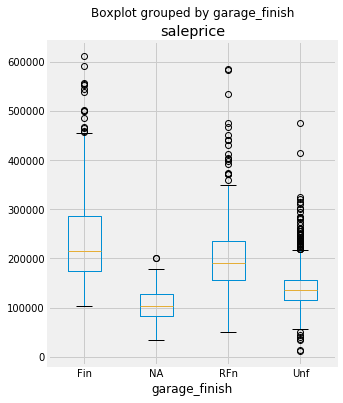

In [99]:
# Distribution of saleprice by garage_finish
boxplot('saleprice','garage_finish')

Distinct variation in absence (NA) of garage with the remaining cohort. 

In [100]:
# Ordinal encoding for garage_finish
# Data dict: Fin,RFn,Unf,NA
print(df['garage_finish'].value_counts())
df['garage_finish'] = df['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0})

Unf    848
RFn    579
Fin    509
NA     113
Name: garage_finish, dtype: int64


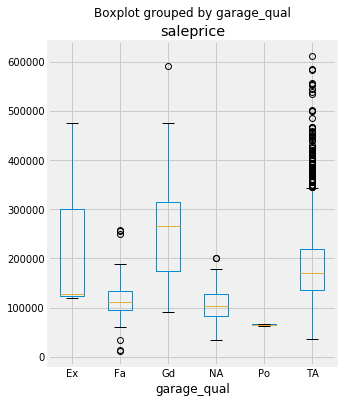

In [101]:
# Distribution of saleprice by garage_qual
boxplot('saleprice','garage_qual')

Cluster among Fa, Po and NA ratings. Significant number of outliers for TA (Typical/Average) garage finish. This could be due to other underlying factors that drives up the saleprice for such garage quality type.

In [102]:
# Ordinal encoding for garage_qual
# Data dict: Ex,Gd,TA,Fa,Po,NA
print(df['garage_qual'].value_counts())
df['garage_qual'] = df['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

TA    1831
NA     113
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64


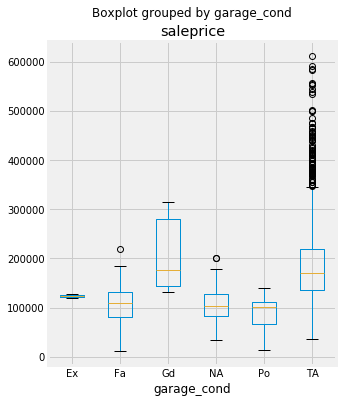

In [103]:
# Distribution of saleprice by garage_cond
boxplot('saleprice','garage_cond')

Similarly, there is a Cluster among Fa, Po and NA ratings. Interestingly, Ex (excellent) garage condition is not a strong driver of salesprice. Significant number of outliers for TA (Typical/Average) garage finish. This could be due to other underlying factors that drives up the saleprice for such garage quality type.

In [104]:
# Ordinal encoding for garage_cond
# Data dict: Ex,Gd,TA,Fa,Po,NA
print(df['garage_cond'].value_counts())
df['garage_cond'] = df['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

TA    1867
NA     113
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64


#### Pool and Fence feature(s)

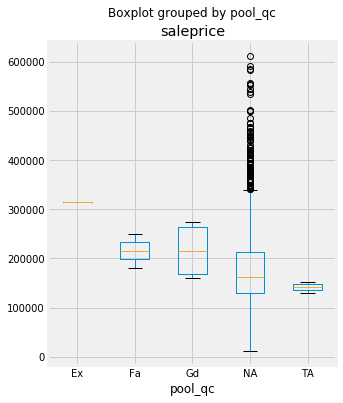

In [105]:
# Distribution of saleprice by pool_qc
boxplot('saleprice','pool_qc')

Signifcant number of outliers in the NA rating. Clear distinct in distribution between the Ex rating from the rest of cohort.

In [106]:
# Ordinal encoding for pool_qc
# Data dict: Ex,Gd,TA,Fa,NA
print(df['pool_qc'].value_counts())
df['pool_qc'] = df['pool_qc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'NA':1})

NA    2040
Gd       4
Fa       2
TA       2
Ex       1
Name: pool_qc, dtype: int64


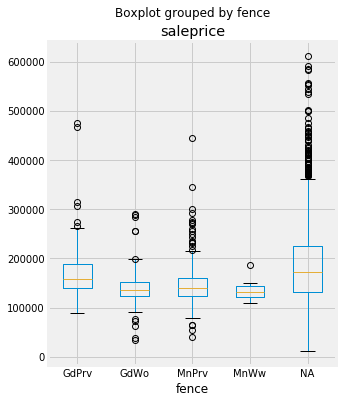

In [107]:
# Distribution of saleprice by fence
boxplot('saleprice','fence')

Significant number of outliers in the NA rating for fence quality. There is a majority of housing in the dataset without fence.

In [108]:
# Ordinal encoding for fence
# Data dict: GdPrv,MnPrv,GdWo,MnWw,NA
print(df['fence'].value_counts())
df['fence'] = df['fence'].map({'GdPrv':5,'MnPrv':4,'GdWo':3,'MnWw':2,'NA':1})

NA       1651
MnPrv     225
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64


### Correlation of encoded variables with target

In [109]:
# Dataframe of the above encoded variables + saleprice
df_encode = df[['utilities','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1',\
                'bsmtfin_type_2','heating_qc','central_air','electrical','kitchen_qual','functional','fireplace_qu',\
                'garage_finish','garage_qual','garage_cond','pool_qc','fence','saleprice']]

In [110]:
# Correlation with target
cor_target2 = abs(df_encode.corr()['saleprice']).sort_values()
cor_target2

bsmtfin_type_2    0.013851
pool_qc           0.030548
exter_cond        0.036247
utilities         0.036403
functional        0.125929
fence             0.157801
bsmt_cond         0.223401
electrical        0.246914
garage_cond       0.265570
central_air       0.277734
garage_qual       0.285908
bsmtfin_type_1    0.349865
bsmt_exposure     0.425331
fireplace_qu      0.538615
garage_finish     0.557806
bsmt_qual         0.612414
kitchen_qual      0.692481
exter_qual        0.712062
saleprice         1.000000
Name: saleprice, dtype: float64

In general, the 'condition' category for basement, garage and exterior housing furnish is not as strongly associated to saleprice, compared to the 'quality' category. Functionality rating of the housing is not as strongly associated to saleprice as expected. 

In [111]:
df_heatmap2 = df[['exter_qual','kitchen_qual','bsmt_qual','garage_finish','fireplace_qu','saleprice']]

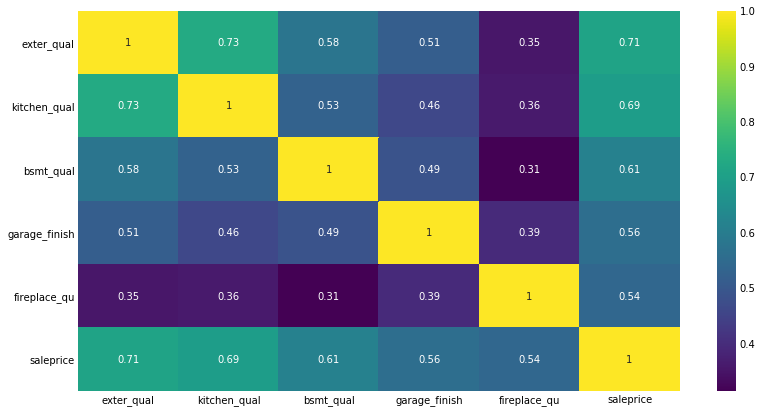

In [112]:
# Check collinearity among variables
plt.figure(figsize=(12,7))
sns.heatmap(df_heatmap2.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

Interestingly, exter_qual and kitchen_qual are highly correlated with each other. Use exter_qual.

**Predictors shortlist (rd_2)**: exter_qual, bsmt_qual, garage_finish, fireplace_qu

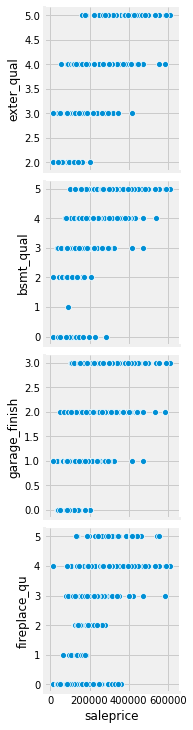

In [113]:
# Check linearity of variables to target
sns.pairplot(df, y_vars=['exter_qual','bsmt_qual','garage_finish','fireplace_qu'], x_vars=['saleprice']);

In [114]:
# Check collinearity among variables
df_heatmap1_2 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath',\
                    'mas_vnr_area','huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','exter_qual',\
                    'bsmt_qual','garage_finish','fireplace_qu','saleprice']]

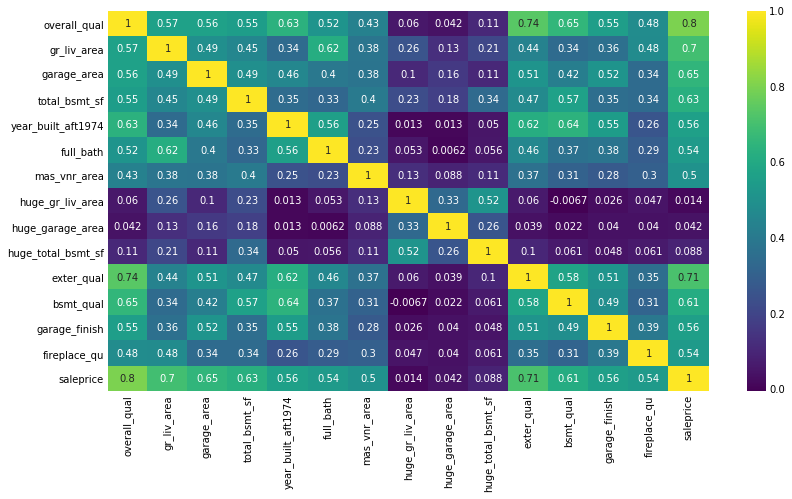

In [115]:
plt.figure(figsize=(12,7))
sns.heatmap(df_heatmap1_2.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

Observe that exter_qual and overall_qual are strongly correlated with each other. We shall omit exter_qual the shortlisted predictors.

**Predictors to use (rd_2)**: bsmt_qual, garage_finish, fireplace_qu

### Modeling: Model 2

In [117]:
# Build model2
X2 = df[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
        'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','bsmt_qual','garage_finish','fireplace_qu']].values
y2 = df['saleprice'].values

model_2 = LinearRegression()
model_2.fit(X2, y2)

y_pred_2 = model_2.predict(X2)

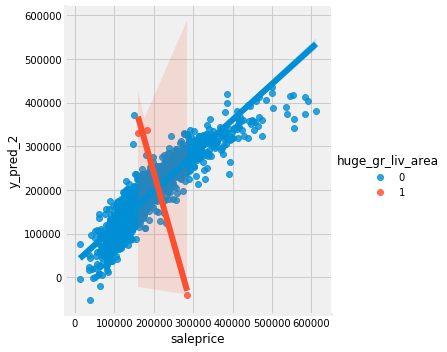

In [118]:
# True saleprice vs predicted saleprice
df['y_pred_2'] = y_pred_2
sns.lmplot(x='saleprice', y='y_pred_2', data=df, hue='huge_gr_liv_area');
#sns.lmplot(x='saleprice', y='y_pred_2', data=df, hue='huge_garage_area')
#sns.lmplot(x='saleprice', y='y_pred_2', data=df, hue='huge_total_bsmt_sf')

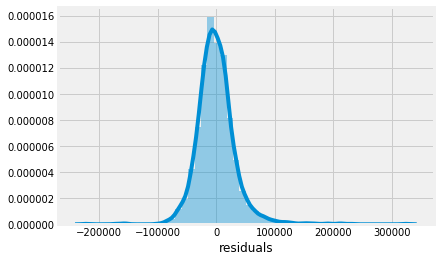

In [119]:
# Visualise normality of residuals (errors)
df['residuals'] = df['saleprice'] - df['y_pred_2']
sns.distplot(df['residuals']);

Errors are approximately normal.

### Model Evaluation: Model 2

In [120]:
# Model_1 metrics
model_metrics(df['saleprice'],y_pred_1,X1.shape[1])

Mean squared error      =  1189119023.198987
Root mean squared error =  34483.6051363396
R^2                     =  0.8106322403433646
Adjusted R^2            =  0.8097030560467178


In [121]:
# Model_2 metrics
model_metrics(df['saleprice'],y_pred_2,X2.shape[1])

Mean squared error      =  1141871697.3997076
Root mean squared error =  33791.59211105194
R^2                     =  0.818156399037174
Adjusted R^2            =  0.8169947445838488


Model performs better; lowered rmse and increased r2, r2 adjusted.

### Feature Engineering4 (Categorical Variables-Nominal)

Moving on to catergorical nominal variables. Variables concerning type of sale and location of housing should be associated with saleprice.

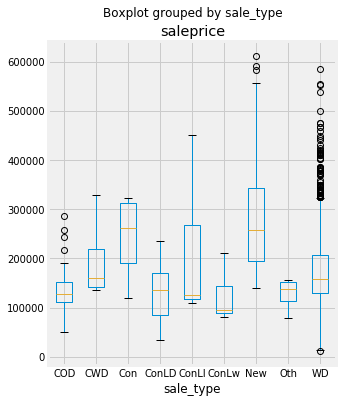

In [135]:
# Distribution of saleprice by pool_qc
boxplot('saleprice','sale_type')

It appears New and WD sale types drives saleprice more strongly than the rest of cohort.

In [122]:
# Check unique values for sale_type
df['sale_type'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI', 'ConLw'],
      dtype=object)

In [123]:
# Convert sale_type into dummy-coded variables
type_dummy_saletype = pd.get_dummies(df['sale_type'])
type_dummy_saletype.head()

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [124]:
# drop oth column
type_dummy_saletype.drop('Oth', axis=1, inplace=True)

In [125]:
df1 = pd.concat([df, type_dummy_saletype], axis=1)
df1.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,year_built_aft1974,year_remod/add_aft1993,yr_sold_aft2008,huge_gr_liv_area,huge_garage_area,huge_total_bsmt_sf,y_pred_1,residuals,y_pred_2,COD,CWD,Con,ConLD,ConLI,ConLw,New,WD
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,4,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,Ex,1,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,1,1,NA,0,3,2010,WD,130500,1,1,1,0,0,0,179983.288815,-42232.194949,172732.194949,0,0,0,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,4,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,Ex,1,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,1,1,NA,0,4,2009,WD,220000,1,1,1,0,0,0,238091.971718,-19029.218686,239029.218686,0,0,0,0,0,0,0,1


In [139]:
df1.columns


Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

### Modeling: Model 3

In [128]:
# Build model 3
X3 = df1[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built_aft1974','full_bath','mas_vnr_area',\
        'huge_gr_liv_area','huge_garage_area','huge_total_bsmt_sf','bsmt_qual','garage_finish','fireplace_qu',\
        'COD','CWD','Con','Con','ConLD','ConLI','ConLw','New','WD']].values
y3 = df1['saleprice'].values

model_3 = LinearRegression()
model_3.fit(X3, y3)

y_pred_3 = model_3.predict(X3)

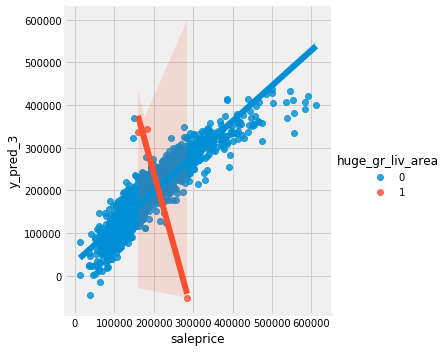

In [129]:
# True saleprice vs predicted saleprice
df['y_pred_3'] = y_pred_3
sns.lmplot(x='saleprice', y='y_pred_3', data=df, hue='huge_gr_liv_area');
#sns.lmplot(x='saleprice', y='y_pred_3', data=df, hue='huge_garage_area')
#sns.lmplot(x='saleprice', y='y_pred_3', data=df, hue='huge_total_bsmt_sf')

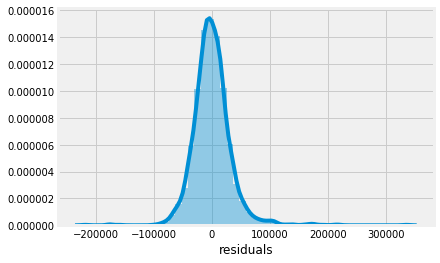

In [130]:
# Visualise normality of residuals (errors)
df['residuals'] = df['saleprice'] - df['y_pred_3']
sns.distplot(df['residuals']);

Errors are approximately normal.

### Model Evaluation: Model 3

In [144]:
# Model 2 metrics
model_metrics(df['saleprice'],y_pred_2,X2.shape[1])

Mean squared error      =  1141871697.3997076
Root mean squared error =  33791.59211105194
R^2                     =  0.818156399037174
Adjusted R^2            =  0.8169947445838488


In [145]:
# Model 3 metrics
model_metrics(df['saleprice'],y_pred_3,X3.shape[1])

Mean squared error      =  1087322441.1242907
Root mean squared error =  32974.57264505926
R^2                     =  0.8268433935686563
Adjusted R^2            =  0.824963114525473


In [ ]:
# Model metrics

In [ ]:
# Relationship between variables to target (saleprice)
# Linearity of 
wood_deck_sf 
open_porch_sf
enclosed_porch
3ssn_porch 
screen_porch     
pool_area

In [ ]:
# code to check for outliers
df.describe()

In [ ]:
# Check shape of df

In [ ]:
# check null values presence

In [ ]:
# Outliers in miscellaneous feature value (price)
plt.figure(figsize = (6,6))
plt.title("Miscellaneous value boxplot", size=16)
sns.boxplot(data = df['misc_val'], linewidth=2, fliersize=3)
plt.ylabel("Price", size=10)
plt.xticks(size=10)
plt.yticks(size=10);

### Exploratory Visualizations

distributions
correlations
relationships to target

### Pre-processing

one hot encode, train/test/split, scale, consider automated feature selection

### Modeling, Inferential Visualizations and Model Evaluations

baseline score

### Data Cleaning for Test dataset

All data cleaning steps to apply for training dataset.

### Business Recommendations

- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?